In [2]:
!python --version
!date
!which python

Python 3.12.4
Sat Sep 28 22:24:34 CST 2024
/public/workspace/ryrl/venvs/versions/3.12.4/scanpy/bin/python


In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import scanpy as sc

import seaborn as sns

warnings.filterwarnings('ignore')
sns.set_style(style='white')
sns.set_theme(style='ticks')
%load_ext autotime

time: 135 μs (started: 2024-09-29 14:10:32 +08:00)


In [2]:
adata = sc.read_10x_h5('/public/workspace/ryrl/data/10X/10k_Human_PBMC_TotalSeqB_3p_gemx_10k_Human_PBMC_TotalSeqB_3p_gemx_count_sample_filtered_feature_bc_matrix.h5')
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 10476 × 38606
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence'

time: 3.22 s (started: 2024-09-29 14:10:35 +08:00)


In [3]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')
adata.var['ribo'] = adata.var_names.str.startswith(('RPL', 'RPS'))
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

time: 51.7 ms (started: 2024-09-29 14:10:40 +08:00)


In [4]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo', 'hb'], inplace=True, log1p=True)

time: 2 s (started: 2024-09-29 14:10:46 +08:00)


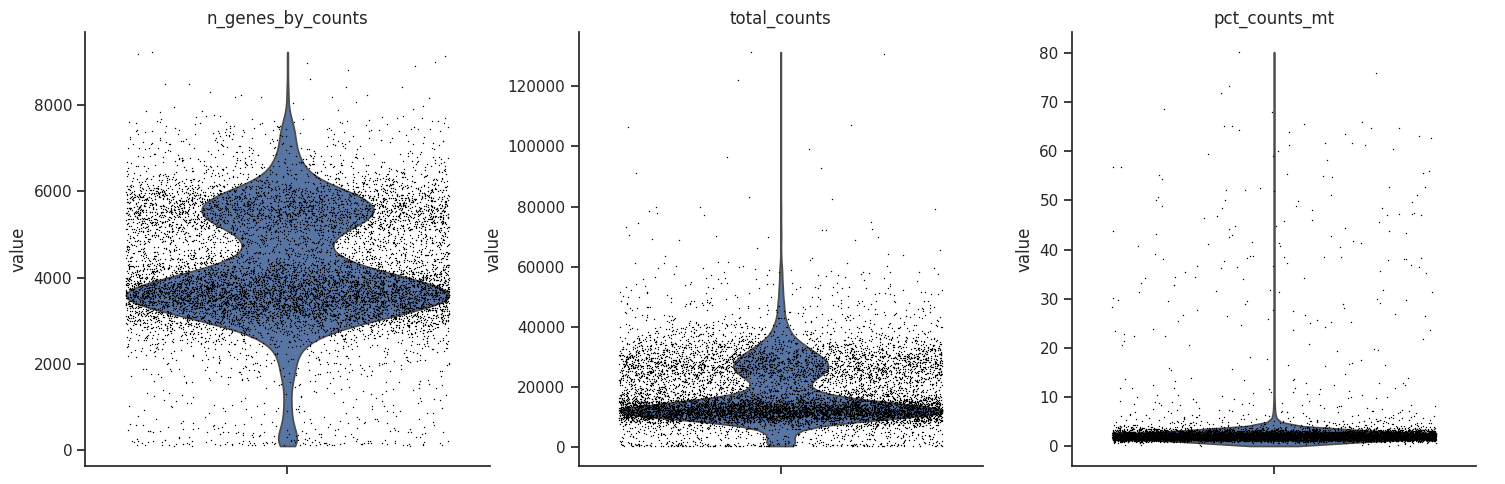

time: 1.57 s (started: 2024-09-29 14:10:49 +08:00)


In [5]:
sc.pl.violin(adata,["n_genes_by_counts", "total_counts", "pct_counts_mt"],jitter=0.4,multi_panel=True,)

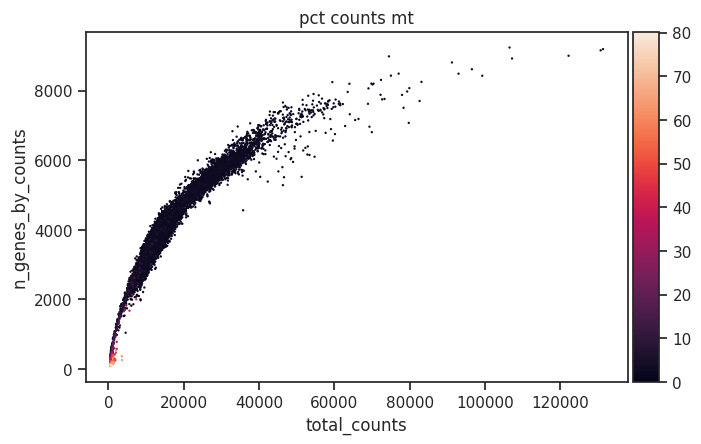

time: 478 ms (started: 2024-09-29 14:10:50 +08:00)


In [6]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [7]:
sc.pp.scrublet(adata)

time: 2min 16s (started: 2024-09-29 14:10:52 +08:00)


In [8]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

time: 807 ms (started: 2024-09-29 14:13:15 +08:00)


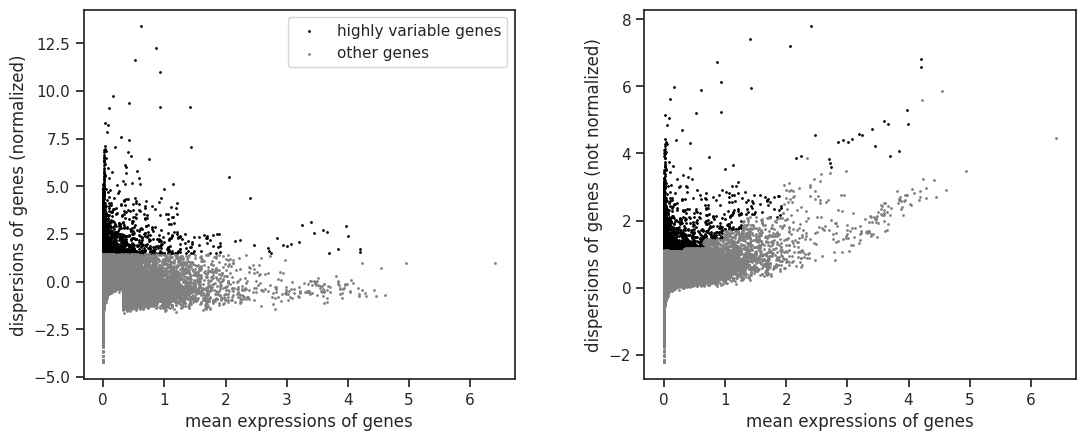

time: 1.32 s (started: 2024-09-29 14:13:18 +08:00)


In [9]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
sc.pl.highly_variable_genes(adata)

In [30]:
# adata[adata.obs['predicted_doublet'] == False].write('/public/workspace/ryrl/projects/classmates/ryrl/GraphCausal/10X/GEMXHumanPBMC.h5ad')

time: 2.12 s (started: 2024-09-28 22:37:30 +08:00)


In [39]:
# coef = np.corrcoef(adata.to_df(), rowvar=True)
# coef_ = np.where(np.abs(coef) < .7, 0, coef)
# print(coef_.shape, coef.shape)
# cells = adata.to_df().index
# coef_ = pd.DataFrame(coef_, index=cells, columns=cells)
# coef_.head()
# coef_.to_parquet('/public/workspace/ryrl/projects/classmates/ryrl/GraphCausal/10X/GEMXHumanPBMC_coef.parquet')

(10476, 10476) (10476, 10476)
time: 13.1 s (started: 2024-09-28 22:49:05 +08:00)


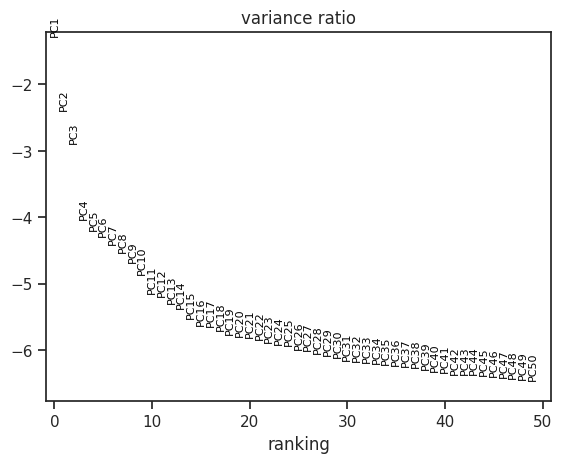

time: 6.3 s (started: 2024-09-29 14:14:15 +08:00)


In [10]:
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

In [11]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.tsne(adata, n_pcs=13, n_jobs=13)

time: 2min 20s (started: 2024-09-29 14:15:58 +08:00)


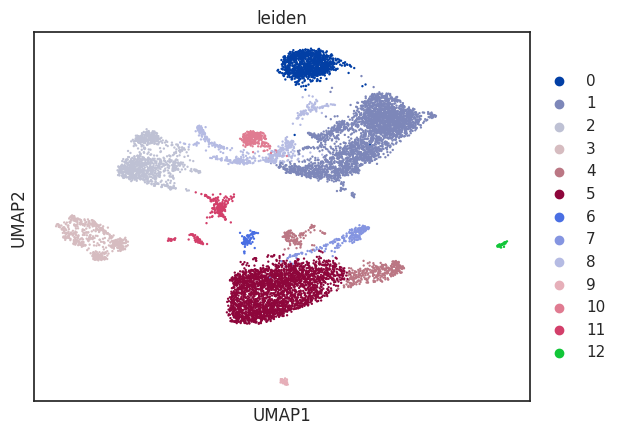

time: 849 ms (started: 2024-09-29 14:22:04 +08:00)


In [27]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(adata, flavor="igraph", n_iterations=2, resolution=.2)
sc.pl.umap(adata, color=["leiden"])

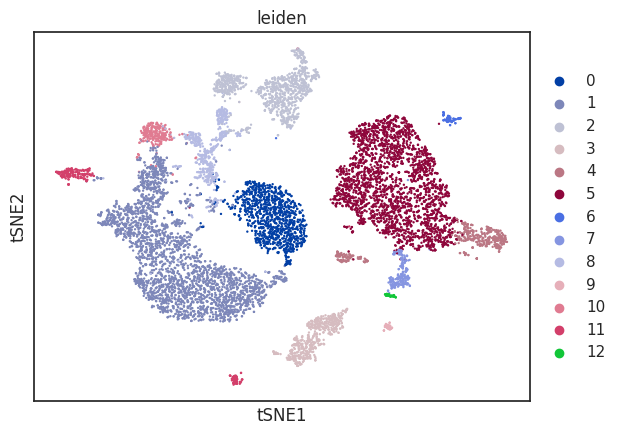

time: 402 ms (started: 2024-09-29 14:22:08 +08:00)


In [28]:
# sc.tl.tsne(adata, n_pcs=13, n_jobs=13)
# sc.tl.leiden(adata, flavor="igraph", n_iterations=2, resolution=.5)
sc.pl.tsne(adata, color=['leiden'])